In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv(r"F:\mal datasets\laptop\laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.shape

(1303, 12)

In [6]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
df.drop(columns='Unnamed: 0',axis= 1, inplace=True)

<Axes: >

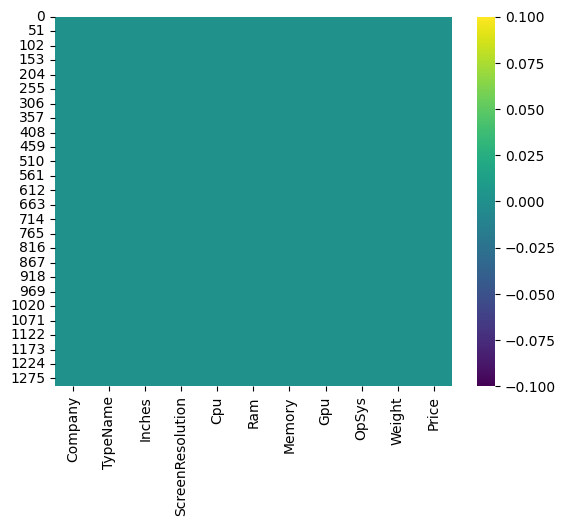

In [8]:
sns.heatmap(df.isnull(),cmap='viridis')

In [9]:
df['Ram(GB)'] = df['Ram'].str.extract(r'(\d+)').astype(int)
df['Weight(kg)'] = df['Weight'].str.extract(r'(\d+\.?\d*)').astype(float)

In [10]:
df.drop(columns='Ram', axis=1,inplace=True)
df.drop(columns='Weight', axis=1,inplace=True)

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price,Ram(GB),Weight(kg)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,8,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,16,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,8,1.37


In [12]:
df['Inches'].isnull().sum()

0

In [13]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

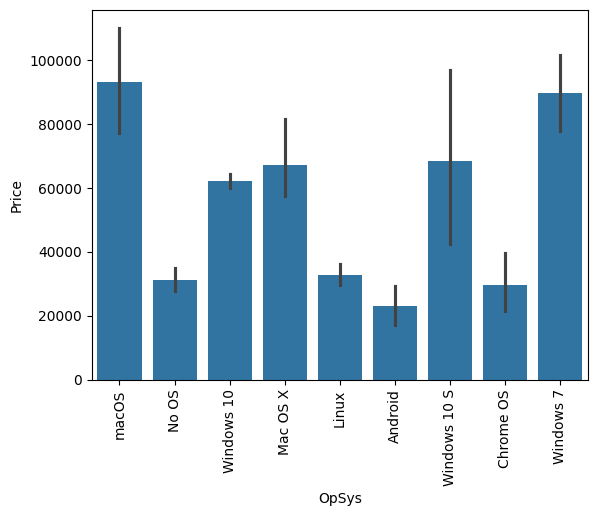

In [14]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [15]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

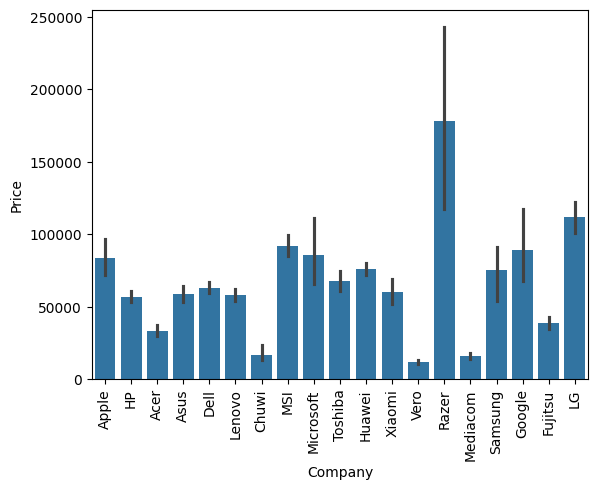

In [16]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

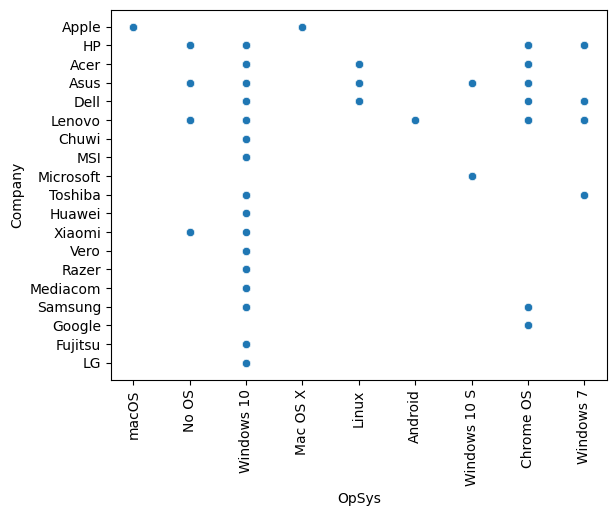

In [17]:
sns.scatterplot(x=df['OpSys'],y=df['Company'])
plt.xticks(rotation = 'vertical')
plt.show()

In [18]:
df_hp=df[df['Company']=="HP"]
df_hp['OpSys'].value_counts()

OpSys
Windows 10    235
Windows 7      23
No OS          12
Chrome OS       4
Name: count, dtype: int64

In [19]:
df_hp=df[df['Company']=="Asus"]
df_hp['OpSys'].value_counts()

OpSys
Windows 10      139
Linux            10
No OS             4
Chrome OS         3
Windows 10 S      2
Name: count, dtype: int64

In [20]:
df_hp=df[df['Company']=="Lenovo"]
df_hp['OpSys'].value_counts()

OpSys
Windows 10    232
No OS          47
Windows 7      13
Chrome OS       3
Android         2
Name: count, dtype: int64

In [21]:
def comp(com):
    if com == "No OS":
        return "Windows 10"
    else:
        return com

In [22]:
df['OpSys']=df['OpSys'].apply(comp)

In [23]:
df['OpSys'].value_counts()

OpSys
Windows 10      1138
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price,Ram(GB),Weight(kg)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows 10,30636.0000,8,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,16,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,8,1.37


In [25]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [26]:
df['Gpu'] = df['Gpu'].apply(lambda x: x.split()[0])

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price,Ram(GB),Weight(kg)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel,macOS,71378.6832,8,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel,macOS,47895.5232,8,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel,Windows 10,30636.0000,8,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD,macOS,135195.3360,16,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel,macOS,96095.8080,8,1.37


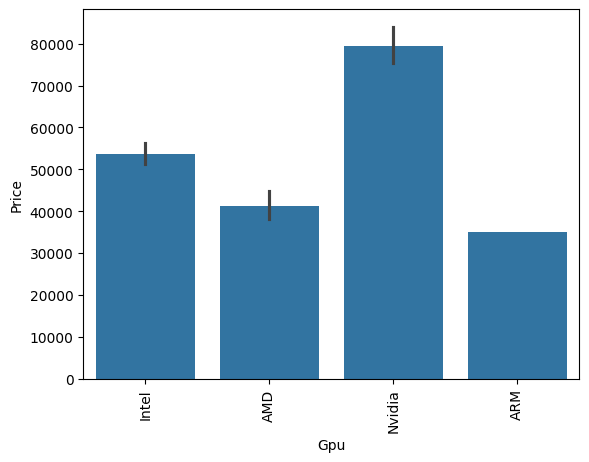

In [28]:
sns.barplot(x=df['Gpu'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [29]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [30]:
df['SSD'] = df['Memory'].apply(lambda x: x.split()[0] if "SSD" in x else 0)

In [31]:
df['SSD'] = df['SSD'].str.extract(r'(\d+)').astype(float)

In [32]:
df['SSD'] = df['SSD'].fillna(0).astype(int)

In [33]:
df['HDD'] = df['Memory'].str.extract(r'(\d+)TB')

In [34]:
df['HDD'] = df['HDD'].fillna(0).astype(int)

In [35]:
df['HDD'].value_counts()

HDD
0    850
1    422
2     31
Name: count, dtype: int64

In [36]:
df.drop(columns='Memory',axis=1,inplace=True)

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Gpu,OpSys,Price,Ram(GB),Weight(kg),SSD,HDD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,Intel,macOS,71378.6832,8,1.37,128,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,Intel,macOS,47895.5232,8,1.34,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,Intel,Windows 10,30636.0000,8,1.86,256,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,AMD,macOS,135195.3360,16,1.83,512,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,Intel,macOS,96095.8080,8,1.37,256,0


In [38]:
df['cpu_com']=df['Cpu'].apply(lambda x: x.split()[0])

In [39]:
df['CPU_Series'] = df['Cpu'].str.extract(r'(i\d|Ryzen \d)')

In [40]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Gpu,OpSys,Price,Ram(GB),Weight(kg),SSD,HDD,cpu_com,CPU_Series
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,Intel,macOS,71378.6832,8,1.37,128,0,Intel,i5


In [41]:
df = pd.get_dummies(df,columns=['cpu_com'],drop_first=True)
df = pd.get_dummies(df,columns=['CPU_Series'],drop_first=True)
df = pd.get_dummies(df,columns=['Gpu'],drop_first=True)

In [42]:
df= df.drop(['Cpu'],axis=1)

In [43]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,OpSys,Price,Ram(GB),Weight(kg),SSD,HDD,cpu_com_Intel,cpu_com_Samsung,CPU_Series_i3,CPU_Series_i5,CPU_Series_i7,Gpu_ARM,Gpu_Intel,Gpu_Nvidia
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,macOS,71378.6832,8,1.37,128,0,True,False,False,True,False,False,True,False


In [44]:
company_counts = df['Company'].value_counts()
rare_companies = company_counts[company_counts < 10].index
df['Company'] = df['Company'].replace(rare_companies, 'Other')

In [45]:
df = pd.get_dummies(df, columns=['Company'], drop_first=True)

In [46]:
df = pd.get_dummies(df, columns=['TypeName'], drop_first=True)

In [47]:
df.head()

,Inches,ScreenResolution,OpSys,Price,Ram(GB),Weight(kg),SSD,HDD,cpu_com_Intel,cpu_com_Samsung,...,Company_HP,Company_Lenovo,Company_MSI,Company_Other,Company_Toshiba,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,13.3,IPS Panel Retina Display 2560x1600,macOS,71378.6832,8,1.37,128,0,True,False,...,False,False,False,False,False,False,False,False,True,False
1,13.3,1440x900,macOS,47895.5232,8,1.34,0,0,True,False,...,False,False,False,False,False,False,False,False,True,False
2,15.6,Full HD 1920x1080,Windows 10,30636.0000,8,1.86,256,0,True,False,...,True,False,False,False,False,False,False,True,False,False
3,15.4,IPS Panel Retina Display 2880x1800,macOS,135195.3360,16,1.83,512,0,True,False,...,False,False,False,False,False,False,False,False,True,False
4,13.3,IPS Panel Retina Display 2560x1600,macOS,96095.8080,8,1.37,256,0,True,False,...,False,False,False,False,False,False,False,False,True,False


In [48]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [49]:
df['Resolution_Extracted'] = df['ScreenResolution'].str.extract(r'(\d{3,4}x\d{3,4})')

In [50]:
df.head()

,Inches,ScreenResolution,OpSys,Price,Ram(GB),Weight(kg),SSD,HDD,cpu_com_Intel,cpu_com_Samsung,...,Company_Lenovo,Company_MSI,Company_Other,Company_Toshiba,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Resolution_Extracted
0,13.3,IPS Panel Retina Display 2560x1600,macOS,71378.6832,8,1.37,128,0,True,False,...,False,False,False,False,False,False,False,True,False,2560x1600
1,13.3,1440x900,macOS,47895.5232,8,1.34,0,0,True,False,...,False,False,False,False,False,False,False,True,False,1440x900
2,15.6,Full HD 1920x1080,Windows 10,30636.0000,8,1.86,256,0,True,False,...,False,False,False,False,False,False,True,False,False,1920x1080
3,15.4,IPS Panel Retina Display 2880x1800,macOS,135195.3360,16,1.83,512,0,True,False,...,False,False,False,False,False,False,False,True,False,2880x1800
4,13.3,IPS Panel Retina Display 2560x1600,macOS,96095.8080,8,1.37,256,0,True,False,...,False,False,False,False,False,False,False,True,False,2560x1600


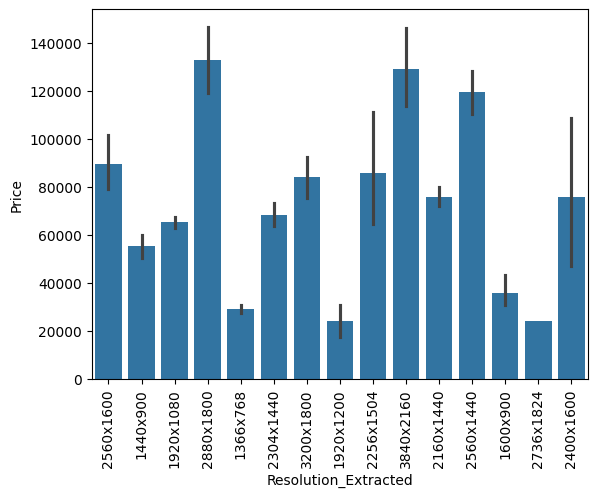

In [51]:
sns.barplot(x=df['Resolution_Extracted'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [52]:
df[['Width', 'Height']] = df['Resolution_Extracted'].str.split('x', expand=True).astype(int)


In [53]:
df = df.drop(columns=['ScreenResolution','Resolution_Extracted','OpSys'])

In [54]:
df.head(1)

,Inches,Price,Ram(GB),Weight(kg),SSD,HDD,cpu_com_Intel,cpu_com_Samsung,CPU_Series_i3,CPU_Series_i5,...,Company_MSI,Company_Other,Company_Toshiba,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Width,Height
0,13.3,71378.6832,8,1.37,128,0,True,False,False,True,...,False,False,False,False,False,False,True,False,2560,1600


In [55]:
df.columns

Index(['Inches', 'Price', 'Ram(GB)', 'Weight(kg)', 'SSD', 'HDD',
       'cpu_com_Intel', 'cpu_com_Samsung', 'CPU_Series_i3', 'CPU_Series_i5',
       'CPU_Series_i7', 'Gpu_ARM', 'Gpu_Intel', 'Gpu_Nvidia', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Other', 'Company_Toshiba', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Width', 'Height'],
      dtype='object')

In [56]:
df=df.drop(columns=['Height','Inches','Weight(kg)'])

In [57]:
pd.set_option('display.max_columns', None)
df.corr()

,Price,Ram(GB),SSD,HDD,cpu_com_Intel,cpu_com_Samsung,CPU_Series_i3,CPU_Series_i5,CPU_Series_i7,Gpu_ARM,Gpu_Intel,Gpu_Nvidia,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Other,Company_Toshiba,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Width
Price,1.000000,0.743007,0.553153,0.031929,0.181127,-0.018431,-0.284372,-0.107827,0.556782,-0.018431,-0.184205,0.348797,0.080688,-0.010376,0.048509,-0.041291,-0.029007,0.180100,0.075249,0.040339,0.375789,-0.097572,-0.549248,0.255658,0.249752,0.556529
Ram(GB),0.743007,1.000000,0.464498,0.227572,0.107051,-0.023894,-0.242966,-0.194022,0.556425,-0.023894,-0.319551,0.415464,0.023950,0.088634,0.082241,-0.149220,-0.036538,0.190425,0.036211,0.010946,0.481728,-0.102976,-0.416486,0.087470,0.062353,0.433121
SSD,0.553153,0.464498,1.000000,-0.321206,0.100210,-0.029197,-0.229784,-0.046374,0.413453,-0.029197,-0.008302,0.104463,0.014607,0.000125,-0.005105,-0.041320,0.052992,0.079424,0.034710,0.067899,0.105033,-0.052760,-0.402506,0.325457,0.055329,0.421048
HDD,0.031929,0.227572,-0.321206,1.000000,-0.037783,-0.019418,0.054368,-0.151873,0.177702,-0.019418,-0.446137,0.371666,-0.089675,0.134422,0.074812,-0.098676,-0.056321,0.239260,-0.111553,-0.137026,0.408921,-0.097996,0.020275,-0.270523,-0.056643,0.005886
cpu_com_Intel,0.181127,0.107051,0.100210,-0.037783,1.000000,-0.122952,0.076947,0.156275,0.185752,-0.122952,0.251270,0.150019,0.028849,-0.036835,0.122473,-0.103180,-0.013988,0.046868,0.027044,0.044082,0.038438,0.031526,-0.143000,0.084837,0.034007,0.098520
cpu_com_Samsung,-0.018431,-0.023894,-0.029197,-0.019418,-0.122952,1.000000,-0.009461,-0.019214,-0.022839,1.000000,-0.030894,-0.018445,-0.003547,-0.010295,-0.015058,-0.014301,-0.015058,-0.005762,0.137313,-0.005420,-0.011975,-0.003876,-0.031135,-0.011661,-0.004181,0.028317
CPU_Series_i3,-0.284372,-0.242966,-0.229784,0.054368,0.076947,-0.009461,1.000000,-0.236681,-0.281325,-0.009461,0.109288,-0.123806,-0.043692,-0.057605,0.041890,0.008632,0.011972,-0.070982,-0.068900,-0.013459,-0.147506,-0.047746,0.268483,-0.129601,-0.051505,-0.188020
CPU_Series_i5,-0.107827,-0.194022,-0.046374,-0.151873,0.156275,-0.019214,-0.236681,1.000000,-0.571351,-0.019214,0.183381,-0.148730,0.067458,-0.116954,0.068700,0.044443,0.006186,-0.094819,-0.038510,0.099349,-0.164530,-0.061125,0.155082,0.010873,-0.082381,-0.066224
CPU_Series_i7,0.556782,0.556425,0.413453,0.177702,0.185752,-0.022839,-0.281325,-0.571351,1.000000,-0.022839,-0.327222,0.421138,-0.055800,0.057949,0.036821,-0.064542,-0.007910,0.205240,0.011071,-0.028339,0.369718,-0.092462,-0.422038,0.151908,0.130077,0.346146
Gpu_ARM,-0.018431,-0.023894,-0.029197,-0.019418,-0.122952,1.000000,-0.009461,-0.019214,-0.022839,1.000000,-0.030894,-0.018445,-0.003547,-0.010295,-0.015058,-0.014301,-0.015058,-0.005762,0.137313,-0.005420,-0.011975,-0.003876,-0.031135,-0.011661,-0.004181,0.028317


In [58]:
df = df.astype(int)

In [59]:
X = df.drop(columns=['Price'])
y = df['Price']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

log transformation

In [61]:
y_train = np.log(y_train)
y_test = np.log(y_test)

imports from scikit learn

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

RandomForestClassifier

In [63]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [64]:
y_pred = rf.predict(X_test)

In [65]:
X_test.dtypes

Ram(GB)                 int32
SSD                     int32
HDD                     int32
cpu_com_Intel           int32
cpu_com_Samsung         int32
CPU_Series_i3           int32
CPU_Series_i5           int32
CPU_Series_i7           int32
Gpu_ARM                 int32
Gpu_Intel               int32
Gpu_Nvidia              int32
Company_Apple           int32
Company_Asus            int32
Company_Dell            int32
Company_HP              int32
Company_Lenovo          int32
Company_MSI             int32
Company_Other           int32
Company_Toshiba         int32
TypeName_Gaming         int32
TypeName_Netbook        int32
TypeName_Notebook       int32
TypeName_Ultrabook      int32
TypeName_Workstation    int32
Width                   int32
dtype: object

In [66]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.83
Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.24


In [67]:
y_pred_org = np.exp(y_pred)
y_test_org = np.exp(y_test)
df_results = pd.DataFrame({'Actual Price': y_test_org, 'Predicted Price': y_pred_org})

In [68]:
df_results.head(5)

,Actual Price,Predicted Price
248,35964.0,48701.438646
556,13586.0,12389.946156
693,137995.0,112713.129326
387,72940.0,110361.260452
781,125208.0,101678.885481


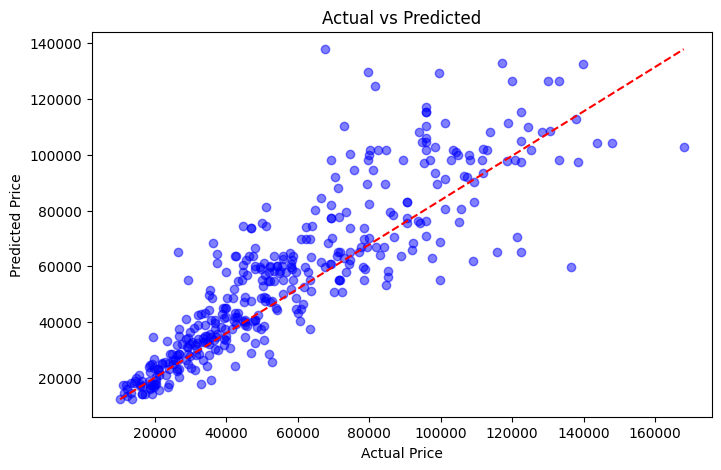

In [69]:
plt.figure(figsize=(8,5))
plt.scatter(y_test_org,y_pred_org, color = 'blue', alpha= 0.5)
plt.plot([y_test_org.min(),y_test_org.max()],[y_pred_org.min(),y_pred_org.max()],color = 'red', linestyle = '--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [70]:
with open('price_pred.pkl','wb') as file:
    pickle.dump(rf, file)